# Business Problem

Build a model which predicts sales based on the money spent on different platforms for marketing.

# Introduction

The dataset consists of 4 columns namely 'TV','Radio','Newspaper','Sales'. In this notebook, I will address the business problem by finding out the most profitable mode of marketing.

## Importing the necessary modules.

In [118]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Reading the dataset into pandas dataframe.

In [ ]:
fname='Downloads/advertising.csv'

In [120]:
data=pd.read_csv(fname)

In [121]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Getting to know the shape of the dataset.

In [122]:
data.shape

(200, 4)

## To get a quick overview of the dataset we use the .info() function.

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


Pandas dataframe.info() function is used to get a concise summary of the dataframe. It comes really handy when doing exploratory analysis of the data.

## Getting to know some basic Statistical Details using .describe() function.

In [124]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.

## Checking for the Null Values in the dataset.

In [125]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Univariate Analysis:

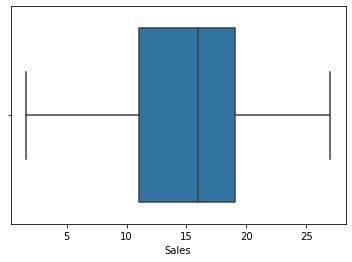

In [126]:
sns.boxplot(data['Sales'])

## Taking a look at how all the three features affect the Sales.

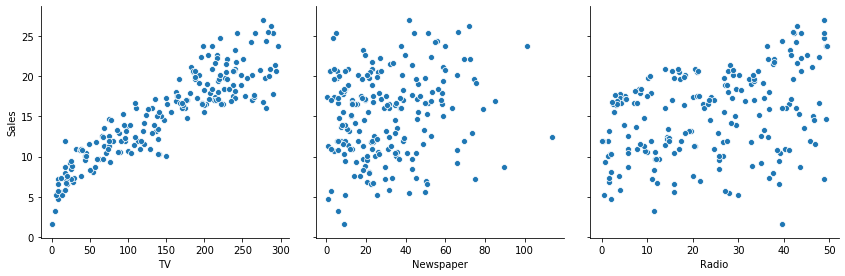

In [127]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

As we can see, the TV is the most important medium in advertising to boost up the sales. So the more money spent on TV advertising, more is the sales outcome.

# Finding the Correlations between features using heatmap.

In [128]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


## What is a heatmap?

Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases.

The diagonals are all 1/dark green because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the larger the number and darker the color the higher the correlation between the two variables. The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.

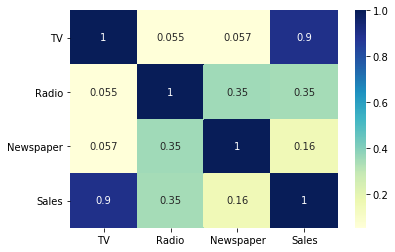

In [129]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)

Using the heatmap, we can come to a conclusion that 90% of the Sales outcome comes from TV advertising. 

## Taking 'TV' as our feature variable to perform Simple Linear Regression.

### Setting  variable X as the TV feature which is also called as the feature variable and  variable y as the Sales which is the response variable.

In [130]:
X= data.iloc[:,:1].values
y= data.iloc[:,3:].values

In the X variable we take all the rows and the first column i.e 'TV'. Whereas, in the y variable we take all the rows and the last column i.e 'Sales'.

# Splitting into training and testing sets:

This task is performed by importing train_test_split from sklearn.model_selection and it is a good practice to split 70% of the data in train set and the remaining 30% in the test set.

In [133]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

# Fitting the Simple Linear Regression Model to the Train set.

In [134]:
from sklearn.linear_model import LinearRegression 
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Predicting the Test set result.

In [136]:
y_pred=regressor.predict(X_test)

# Visualizing the Train Set Results

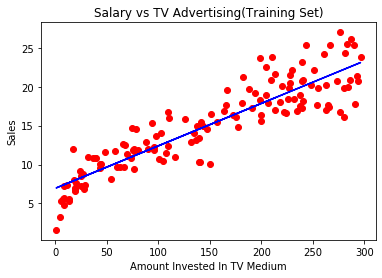

In [138]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('Salary vs TV Advertising(Training Set)')
plt.xlabel('Amount Invested In TV Medium')
plt.ylabel('Sales')
plt.show()

# Visualizig the Test Set Results

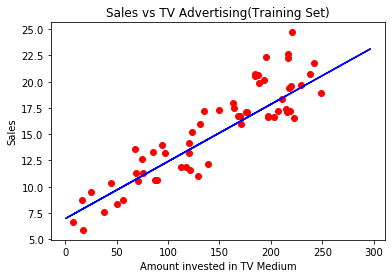

In [139]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('Sales vs TV Advertising(Training Set)')
plt.xlabel('Amount invested in TV Medium')
plt.ylabel('Sales')
plt.show()

# Evaluating the Model:

In [140]:
acc_slr = round(regressor.score(X_train, y_train) * 100, 2)
print(round(acc_slr,2,), "%")

81.58 %


It gives us almost 82% accuracy.

# Calculating the R squared

In [147]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)
r_squared

0.7921031601245662

R-squared measures the strength of the relationship between our model and the dependent variable on a convenient 0 – 100% scale. It should be closer to 1.